# Testing out self intersection
Layers with multiple layers

In [1]:
import maup
import pandas as pd
import geopandas as gp
from shapely.geometry import MultiPolygon, Polygon
from shapely.ops import unary_union


# Load in OH precincts
oh_gen = gp.read_file("./oh_2022_gen_prec_shp/oh_2022_gen_prec_st.shp")

<AxesSubplot:>

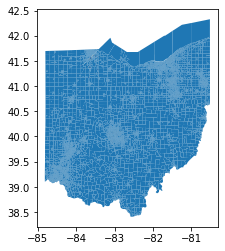

In [2]:
#First, gain some basic practice plotting maps with geopandas

#Basic plot:
oh_gen.plot()

Surprised to see that this plot does not show overlaps even though clark returns self intersections... Perhaps they are small lines.

<AxesSubplot:>

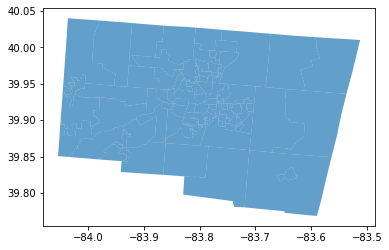

In [8]:
#now subset so easier to process
clark = oh_gen[oh_gen["COUNTYFP"]=="023"]
clark.plot(alpha=0.7)

So, next step, I could create another example, or try to proceed with clark... 

Given that it is not clear what to expect with clark I should probably construct my own example.

Perhaps isolate a precinct shape rather than loading in whole new file

Only precincts from Ohio showing up in the non-overlap as not matching are in wood county

Use NC as example...

<AxesSubplot:>

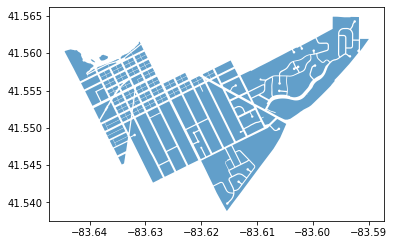

In [13]:
oh_gen[oh_gen["UNIQUE_ID"].isin({'WOOD-PERRYSBURG B','WOOD-PERRYSBURG E','WOOD-PERRYSBURG G',
                                 'WOOD-PERRYSBURG N','WOOD-PERRYSBURG O','WOOD-PERRYSBURG P',})].plot(alpha=0.7)

In [26]:
nc_prec = gp.read_file("../../NC/2022/nc_2022_gen_prec/nc_gen_22_cong_prec.shp")
nc_cong = gp.read_file("../../NC/2022/nc_cong_adopted_2022/NC_SMmap2_Statewide.shp")
nc1 = nc_cong[nc_cong["District_A"]==1]

<AxesSubplot:>

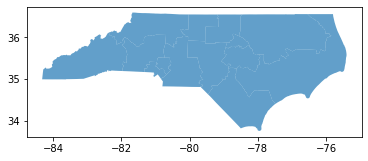

In [17]:
nc_cong.plot(alpha=0.7)

In [31]:
#Overlay single district
nc1_1overlay = gp.overlay(nc1, nc1, how = "intersection", keep_geom_type = False)

In [32]:
nc1_1overlay

,OBJECTID_1,District_A_1,Shape_Leng_1,Shape_Area_1,OBJECTID_2,District_A_2,Shape_Leng_2,Shape_Area_2,geometry
0,1,1,8.604113,2.192938,1,1,8.604113,2.192938,"POLYGON ((-76.91555 36.55214, -76.91553 36.552..."


<AxesSubplot:>

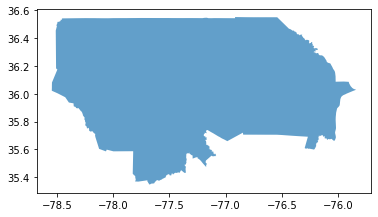

In [33]:
nc1_1overlay.plot(alpha=0.7)

In [34]:
nc1_1overlay["geometry"]

0    POLYGON ((-76.91555 36.55214, -76.91553 36.552...
Name: geometry, dtype: geometry

In [35]:
nc1["geometry"]

0    POLYGON ((-76.91590 36.55215, -76.91555 36.552...
Name: geometry, dtype: geometry

In [36]:
#Overlay full plan with single district
nc_cong_1overlay = gp.overlay(nc_cong, nc1, how = "intersection", keep_geom_type = False)

<AxesSubplot:>

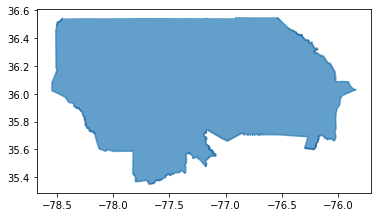

In [38]:
nc_cong_1overlay.plot(alpha=0.7)

In [43]:
nc_cong_1overlay["geometry"]

0    POLYGON ((-76.91555 36.55214, -76.91553 36.552...
1    MULTILINESTRING ((-78.54641 36.02183, -78.5409...
2    MULTILINESTRING ((-77.95391 35.58584, -77.9536...
3    MULTILINESTRING ((-78.45625 36.54109, -78.4558...
4    MULTILINESTRING ((-78.25661 35.81397, -78.2568...
Name: geometry, dtype: geometry

In [37]:
#Overlay full plan with single district
nc_cong_1_1overlay = gp.overlay(nc_cong, nc1_1overlay, how = "intersection", keep_geom_type = False)

<AxesSubplot:>

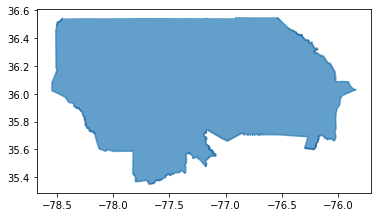

In [40]:
nc_cong_1_1overlay.plot(alpha=0.7)

In [41]:
nc_cong_1_1overlay["geometry"]

0    POLYGON ((-76.91555 36.55214, -76.91553 36.552...
1    MULTILINESTRING ((-78.54641 36.02183, -78.5409...
2    MULTILINESTRING ((-77.95391 35.58584, -77.9536...
3    MULTILINESTRING ((-78.45625 36.54109, -78.4558...
4    MULTILINESTRING ((-78.25661 35.81397, -78.2568...
Name: geometry, dtype: geometry

In [42]:
nc_cong["geometry"]

0     POLYGON ((-76.91590 36.55215, -76.91555 36.552...
1     POLYGON ((-78.70273 36.07617, -78.70164 36.076...
2     POLYGON ((-75.79750 36.55092, -75.79051 36.500...
3     POLYGON ((-78.45625 36.54109, -78.45588 36.541...
4     POLYGON ((-81.61951 36.58729, -81.61856 36.587...
5     POLYGON ((-79.91061 36.54270, -79.91025 36.542...
6     POLYGON ((-78.72336 35.26548, -78.72301 35.265...
7     POLYGON ((-80.21187 36.02681, -80.21170 36.026...
8     POLYGON ((-80.04043 35.92042, -80.03894 35.920...
9     POLYGON ((-80.94711 36.05707, -80.94691 36.057...
10    POLYGON ((-82.34460 36.07110, -82.34437 36.070...
11    POLYGON ((-80.73713 35.50580, -80.73607 35.505...
12    POLYGON ((-78.25661 35.81397, -78.25686 35.813...
13    POLYGON ((-80.95458 35.39484, -80.95464 35.394...
Name: geometry, dtype: geometry

In [46]:
#Go for single overlay to try removing
overlay = gp.overlay(nc1, nc_cong, how="union", keep_geom_type = False)

In [47]:
overlay["geometry"]

0     POLYGON ((-76.91555 36.55214, -76.91553 36.552...
1     MULTILINESTRING ((-78.25597 35.81812, -78.2559...
2     MULTILINESTRING ((-76.54197 36.55065, -76.5416...
3     MULTILINESTRING ((-78.54641 36.02183, -78.5464...
4     MULTILINESTRING ((-77.95391 35.58584, -77.9551...
5     POLYGON ((-78.70164 36.07605, -78.70127 36.076...
6     POLYGON ((-75.79051 36.50016, -75.79056 36.500...
7     POLYGON ((-78.45588 36.54104, -78.45546 36.540...
8     POLYGON ((-81.61951 36.58729, -81.61856 36.587...
9     POLYGON ((-79.91061 36.54270, -79.91025 36.542...
10    POLYGON ((-78.72336 35.26548, -78.72301 35.265...
11    POLYGON ((-80.21187 36.02681, -80.21170 36.026...
12    POLYGON ((-80.04043 35.92042, -80.03894 35.920...
13    POLYGON ((-80.94711 36.05707, -80.94691 36.057...
14    POLYGON ((-82.34460 36.07110, -82.34437 36.070...
15    POLYGON ((-80.73713 35.50580, -80.73607 35.505...
16    POLYGON ((-78.25686 35.81383, -78.25696 35.813...
17    POLYGON ((-80.95458 35.39484, -80.95464 35

<AxesSubplot:>

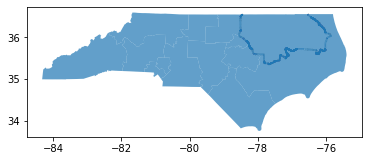

In [48]:
overlay.plot(alpha=0.7)

In [51]:
#Do I want to run another overlay, or can I just cut out the other geometries?
overlay[(overlay["District_A_1"]!=overlay["District_A_2"])&(~overlay["District_A_1"].isna())]

,OBJECTID_1,District_A_1,Shape_Leng_1,Shape_Area_1,OBJECTID_2,District_A_2,Shape_Leng_2,Shape_Area_2,geometry
1,1.0,1.0,8.604113,2.192938,2,2,2.291793,0.131161,"MULTILINESTRING ((-78.25597 35.81812, -78.2559..."
2,1.0,1.0,8.604113,2.192938,3,3,13.787605,2.928661,"MULTILINESTRING ((-76.54197 36.55065, -76.5416..."
3,1.0,1.0,8.604113,2.192938,4,4,3.876041,0.541862,"MULTILINESTRING ((-78.54641 36.02183, -78.5464..."
4,1.0,1.0,8.604113,2.192938,13,13,4.557561,0.475952,"MULTILINESTRING ((-77.95391 35.58584, -77.9551..."


<AxesSubplot:>

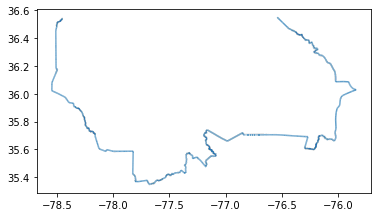

In [52]:
overlay[(overlay["District_A_1"]!=overlay["District_A_2"])&(~overlay["District_A_1"].isna())].plot(alpha=0.7)

<AxesSubplot:>

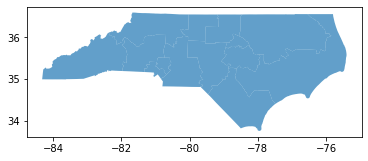

In [53]:
overlay[(overlay["District_A_1"]==overlay["District_A_2"])|(overlay["District_A_1"].isna())].plot(alpha=0.7)

In [54]:
overlay[(overlay["District_A_1"]==overlay["District_A_2"])|(overlay["District_A_1"].isna())]

,OBJECTID_1,District_A_1,Shape_Leng_1,Shape_Area_1,OBJECTID_2,District_A_2,Shape_Leng_2,Shape_Area_2,geometry
0,1.0,1.0,8.604113,2.192938,1,1,8.604113,2.192938,"POLYGON ((-76.91555 36.55214, -76.91553 36.552..."
5,NaN,NaN,NaN,NaN,2,2,2.291793,0.131161,"POLYGON ((-78.70164 36.07605, -78.70127 36.076..."
6,NaN,NaN,NaN,NaN,3,3,13.787605,2.928661,"POLYGON ((-75.79051 36.50016, -75.79056 36.500..."
7,NaN,NaN,NaN,NaN,4,4,3.876041,0.541862,"POLYGON ((-78.45588 36.54104, -78.45546 36.540..."
8,NaN,NaN,NaN,NaN,5,5,8.304280,1.184265,"POLYGON ((-81.61951 36.58729, -81.61856 36.587..."
9,NaN,NaN,NaN,NaN,6,6,3.756372,0.453029,"POLYGON ((-79.91061 36.54270, -79.91025 36.542..."
10,NaN,NaN,NaN,NaN,7,7,7.154692,1.418553,"POLYGON ((-78.72336 35.26548, -78.72301 35.265..."
11,NaN,NaN,NaN,NaN,8,8,6.129734,0.961893,"POLYGON ((-80.21187 36.02681, -80.21170 36.026..."
12,NaN,NaN,NaN,NaN,9,9,6.306343,0.945467,"POLYGON ((-80.04043 35.92042, -80.03894 35.920..."
13,NaN,NaN,NaN,NaN,10,10,5.371365,0.772889,"POLYGON ((-80.94711 36.05707, -80.94691 36.057..."


This seems like a fine result - pulling out the values - but I suppose in other cases I wouldn't know which side to drop...

So, I can take the overlay dataset and drop the other columns to make a little less clear, then try to isolate the "bad" ones.

In [59]:
overlay_side2 = overlay[['OBJECTID_2', 'District_A_2', 'Shape_Leng_2', 'Shape_Area_2','geometry']]

<AxesSubplot:>

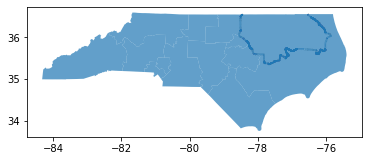

In [60]:
overlay_side2.plot(alpha=0.7)

In [61]:
overlay_self = gp.overlay(overlay_side2, overlay_side2, how="intersection", keep_geom_type = False)

NotImplementedError: df1 contains mixed geometry types.

Maybe peter meant just concat the additional geometry, rather than overlaying...

Try now just concatenating district 1 again

In [66]:
nc1double = gp.GeoDataFrame(pd.concat([nc_cong, nc1], ignore_index=True), crs = nc_cong.crs)

<AxesSubplot:>

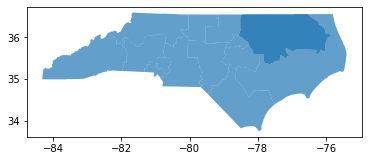

In [69]:
#See additional shading as expected
nc1double.plot(alpha=0.7)

In [71]:
double_overlay = gp.overlay(nc1double, nc1double, how="intersection", keep_geom_type=False)

In [73]:
double_overlay.shape

(81, 9)

In [74]:
nc1double.shape

(15, 5)

<AxesSubplot:>

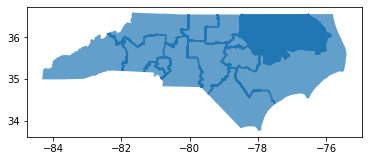

In [75]:
double_overlay.plot(alpha=0.7)

Because lines are caught, this is where the area check comes in Peter was referencing, I believe.

Try calculating area without changing crs, see if I can isolate...

<AxesSubplot:>

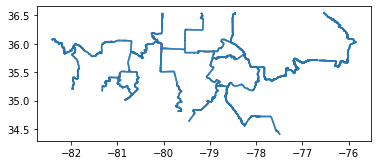

In [80]:
#This returns solely the new trace lines, but does not isolate the problem geometry
double_overlay[double_overlay["District_A_1"]!=double_overlay["District_A_2"]].plot()

<AxesSubplot:>

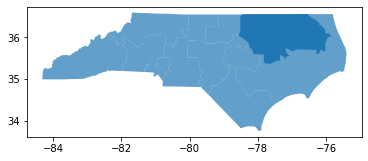

In [79]:
#Appears this brings us back to original
double_overlay[double_overlay["District_A_1"]==double_overlay["District_A_2"]].plot(alpha=0.7)

So it seems area is necessary to find the polygon...

Also, though, seems plausible the lines will still cause issues...

In [88]:
double_overlay[double_overlay.area>0.00001].shape

<ipython-input-88-d57e9c7f8d44>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  double_overlay[double_overlay.area>0.00001].shape


(17, 9)

In [90]:
nc_cong.shape

(14, 5)

In [89]:
sorted(double_overlay.area)

<ipython-input-89-d08f19255d07>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sorted(double_overlay.area)


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.11820473559200584,
 0.12598510115750888,
 0.13116115537050269,
 0.45302850696300795,
 0.47595177173950315,
 0.5418621993674916,
 0.7728886559910013,
 0.9454667110414888,
 0.9618934094990023,
 1.1842651928384975,
 1.4185525303519957,
 1.6013099659619896,
 2.1929384188590055,
 2.1929384188590055,
 2.1929384188590055,
 2.1929384188590055,
 2.928660516534994]

When sorted, still not clear what to cut out - come from IDs in conjunction with area? 

If that is the case, not clear to me what the self intersection actually adds

In [98]:
double_overlay["geometry"].area

<ipython-input-98-5d1f02b7809d>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  double_overlay["geometry"].area


0     2.192938
1     0.000000
2     0.000000
3     0.000000
4     0.000000
        ...   
76    0.000000
77    0.000000
78    0.000000
79    0.000000
80    0.125985
Length: 81, dtype: float64

<ipython-input-102-6cdfa3374d33>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  double_overlay[double_overlay.area>0.0001].drop_duplicates().plot(alpha=0.7)


<AxesSubplot:>

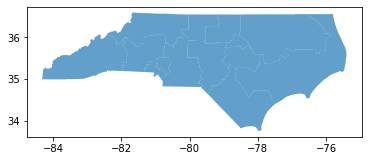

In [102]:
double_overlay[double_overlay.area>0.0001].drop_duplicates().plot(alpha=0.7)

Seemingly, fixes the issue to drop duplicates after intersection lines cut out. Would this be the same impact, though, if done before the overlay occurs?

<AxesSubplot:>

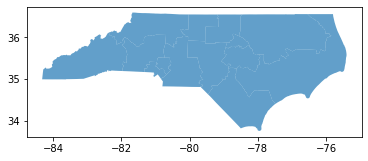

In [103]:
nc1double.drop_duplicates().plot(alpha=0.7)

Seemingly yes, in this case, however Ohio is different - the intersection enables us to pull the double layers out separately...?

In [105]:
nc_cong.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

## So now, take a look at Ohio 
- Can I isolate geometries?
    - If I can, can I drop them?
- Is this a different issue all together since can't even see?

In [108]:
oh_overlay = gp.overlay(oh_gen, oh_gen, how="intersection", keep_geom_type=False)

In [109]:
oh_overlay.shape

(63069, 55)

In [119]:
#Drop small geometries
oh_drop_small = oh_overlay[oh_overlay.area>0.00001].drop_duplicates()

<ipython-input-119-0299d4658e64>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  oh_drop_small = oh_overlay[oh_overlay.area>0.00001].drop_duplicates()


In [140]:
oh_drop_small.shape

(9015, 55)

In [147]:
dup_prec = oh_drop_small["UNIQUE_ID_1"].value_counts()[oh_drop_small["UNIQUE_ID_1"].value_counts()>1].keys()

In [148]:
set(dup_prec)

{'ASHTABULA-ADA',
 'ASHTABULA-ADB',
 'ASHTABULA-AES',
 'BUTLER-MADISON TWP 1',
 'BUTLER-MORGAN TWP 1',
 'BUTLER-OXFORD TWP 3',
 'CLARK-PRECINCT CHAS TWP',
 'CLARK-PRECINCT HARM 2',
 'COLUMBIANA-PRECINCT FAIRFIELD TWP CENTER',
 'COLUMBIANA-PRECINCT FAIRFIELD TWP SOUTH',
 'COLUMBIANA-PRECINCT PERRY TWP NORTH',
 'CUYAHOGA-BRECKSVILLE-00-G',
 'DARKE-AAT',
 'DARKE-ABH',
 'ERIE-PRECINCT CAST VILL',
 'ERIE-PRECINCT HUR B',
 'ERIE-PRECINCT KI VILL',
 'ERIE-PRECINCT MAR TWP #1',
 'ERIE-PRECINCT MAR TWP #2',
 'ERIE-PRECINCT SAN A',
 'ERIE-PRECINCT SAN M',
 'ERIE-PRECINCT VER 1-A',
 'ERIE-PRECINCT VER TWP #1',
 'ERIE-PRECINCT VER TWP #5',
 'ERIE-ZZZ',
 'GEAUGA-PRECINCT THOMPSON TWP A',
 'GEAUGA-PRECINCT THOMPSON TWP B',
 'GREENE-AHU',
 'HAMILTON-HARR TWP BB',
 'HARDIN-DUDLEY',
 'HARDIN-MOUNT VICTORY / RIDGEWAY / HALE',
 'HOCKING-PRECINCT FALLS 2',
 'HURON-ABX',
 'LAKE-PRECINCT MADISON TWP F',
 'LAKE-PRECINCT MADISON TWP I',
 'LAKE-PRECINCT MENTOR CITY 4I',
 'LAKE-ZZZ',
 'LICKING-ADE',
 'LORAIN-PR

In [154]:
dup_prec_df = oh_drop_small[oh_drop_small["UNIQUE_ID_1"].isin(set(dup_prec))]
dup_prec_df["area"] = dup_prec_df.area

<ipython-input-154-6f7844813a2d>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dup_prec_df["area"] = dup_prec_df.area
/Users/lilyfalk/anaconda3/envs/pdv_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<AxesSubplot:>

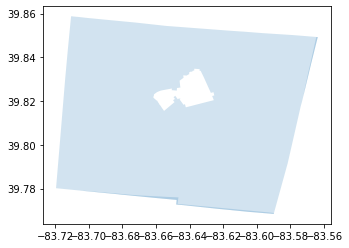

In [165]:
dup_prec_df[dup_prec_df["UNIQUE_ID_1"]=="CLARK-PRECINCT CHAS TWP"].plot(alpha=0.2)

Notice in above plot the lines around the border. Confirms thought that largest area should be selected.

In [167]:
dup_prec_df[dup_prec_df["UNIQUE_ID_1"]=="CLARK-PRECINCT CHAS TWP"].sort_values(by="area")

,UNIQUE_ID_1,COUNTYFP_1,COUNTYNM_1,PRECINCT_1,PRECCODE_1,G22ATGDCRO_1,G22ATGRYOS_1,G22AUDDSAP_1,G22AUDRFAB_1,G22CJUDBRU_1,...,G22SOSRLAR_2,G22TREDSCH_2,G22TRERSPR_2,G22USSDRYA_2,G22USSRVAN_2,VTDST22_2,NEIGHBORS_2,SUM_2,geometry,area
203,CLARK-PRECINCT CHAS TWP,023,CLARK,PRECINCT CHAS TWP,AEF,53.0,337.0,58.0,334.0,70.0,...,346.0,50.0,340.0,69.0,326.0,057AHU,None,None,"POLYGON ((-83.64792 39.77273, -83.64769 39.774...",0.000029
193,CLARK-PRECINCT CHAS TWP,023,CLARK,PRECINCT CHAS TWP,AEF,53.0,337.0,58.0,334.0,70.0,...,684.0,127.0,670.0,173.0,625.0,097AAT,None,None,"MULTIPOLYGON (((-83.56369 39.84929, -83.56388 ...",0.000042
152,CLARK-PRECINCT CHAS TWP,023,CLARK,PRECINCT CHAS TWP,AEF,53.0,337.0,58.0,334.0,70.0,...,336.0,56.0,334.0,85.0,310.0,023AEF,None,None,"POLYGON ((-83.69637 39.85770, -83.69629 39.857...",0.010841


In [166]:
dup_prec_df.sort_values(by="area")

,UNIQUE_ID_1,COUNTYFP_1,COUNTYNM_1,PRECINCT_1,PRECCODE_1,G22ATGDCRO_1,G22ATGRYOS_1,G22AUDDSAP_1,G22AUDRFAB_1,G22CJUDBRU_1,...,G22SOSRLAR_2,G22TREDSCH_2,G22TRERSPR_2,G22USSDRYA_2,G22USSRVAN_2,VTDST22_2,NEIGHBORS_2,SUM_2,geometry,area
33740,SUMMIT-AVX,153,SUMMIT,AVX,AVX,363.0,441.0,370.0,423.0,415.0,...,391.0,214.0,374.0,253.0,331.0,133AAK,None,None,"POLYGON ((-81.39175 41.30696, -81.39175 41.306...",0.000010
21512,PORTAGE-PRECINCT AURORA 5-B,133,PORTAGE,PRECINCT AURORA 5,AAK,204.0,389.0,210.0,378.0,229.0,...,439.0,372.0,427.0,451.0,363.0,153AVX,None,None,"POLYGON ((-81.39212 41.28440, -81.39211 41.284...",0.000010
22007,ERIE-PRECINCT VER 1-A,043,ERIE,PRECINCT VER 1,ABV,166.0,240.0,171.0,231.0,183.0,...,0.0,0.0,0.0,0.0,0.0,None,None,None,"POLYGON ((-82.35981 41.42725, -82.35860 41.427...",0.000010
22432,ERIE-ZZZ,043,ERIE,ZZZ,None,0.0,0.0,0.0,0.0,0.0,...,243.0,169.0,234.0,204.0,202.0,043ABV,None,None,"POLYGON ((-82.34877 41.42823, -82.35007 41.427...",0.000010
7060,HAMILTON-HARR TWP BB,061,HAMILTON,HARR TWP BB,BJA,128.0,681.0,125.0,678.0,140.0,...,302.0,69.0,296.0,89.0,279.0,017AHJ,None,None,"MULTIPOLYGON (((-84.76633 39.30492, -84.76612 ...",0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,MADISON-AAT,097,MADISON,AAT,AAT,117.0,686.0,123.0,671.0,148.0,...,684.0,127.0,670.0,173.0,625.0,097AAT,None,None,"POLYGON ((-83.65226 39.72460, -83.65216 39.725...",0.032561
28338,LUCAS-ZZZ,095,LUCAS,ZZZ,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,None,None,None,"POLYGON ((-83.47857 41.70247, -83.47856 41.702...",0.069309
22016,ERIE-ZZZ,043,ERIE,ZZZ,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,None,None,None,"MULTIPOLYGON (((-82.95293 41.43042, -82.95293 ...",0.102550
15216,LORAIN-ZZZ,093,LORAIN,ZZZ,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,None,None,None,"POLYGON ((-82.34816 41.44136, -82.34810 41.469...",0.119895


## Next step
- For each duplicate prec idea, keep only the entry with highest area.
- Can I systematically isolate this?